In [ ]:
import sys
!{sys.executable} -m pip install mplbplot

In [1]:
import matplotlib.pyplot as plt
import mplhep as hep
plt.style.use(hep.cms.style.ROOT)
import ROOT
import PlotTools
from ROOT import TLine, TFile, TCanvas, kRed, THStack, kYellow, kGreen, kBlack, TLegend, TGraphAsymmErrors

Welcome to JupyROOT 6.18/00


In [2]:
file = ROOT.TFile.Open('../data/shapes_Zprime_m500_gb1_dbs0.root','read')
file.cd()

True

In [3]:
mjjsr = file.Get('mjjsr')
#mjjsr_dcr = file.Get('mjjsr_dcr')
mjjsr_dcr_up = file.Get('mjjsr_TriggerUp')
mjjsr_dcr_down = file.Get('mjjsr_TriggerDown')

INFO:rootpy.plotting.style] using ROOT style 'CMSTDR'
IncrementalExecutor::executeFunction: symbol '_ZN7TTabComC1Ev' unresolved while linking [cling interface function]!
You are probably missing the definition of TTabCom::TTabCom()
Maybe you need to load the corresponding shared library?
IncrementalExecutor::executeFunction: symbol '_ZN7TTabCom4HookEPcPiRNSt3__113basic_ostreamIcNS2_11char_traitsIcEEEE' unresolved while linking [cling interface function]!
You are probably missing the definition of TTabCom::Hook(char*, int*, std::__1::basic_ostream<char, std::__1::char_traits<char> >&)
Maybe you need to load the corresponding shared library?
Error in Interpreter::toString: the input *((std::string*)0x7ffee276a0b8) = cling::printValue((TH1F*)0x7fa31d6ba230); cannot be evaluated

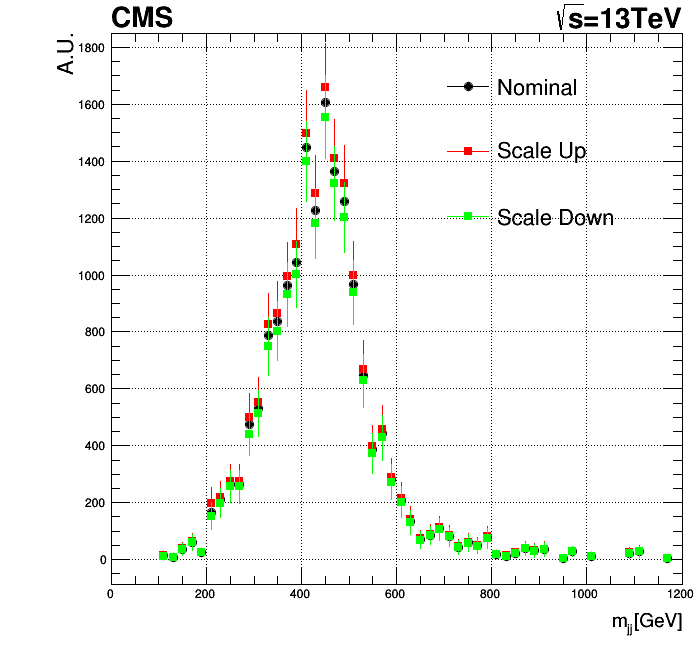

In [4]:
from rootpy.plotting.style import get_style
from rootpy.plotting.style.cmstdr.labels import CMS_label

style = get_style('CMSTDR')

with style:
    c1 = ROOT.TCanvas("","",700,700)
    mjjsr.SetStats(0)
    mjjsr.SetTitle("")
    mjjsr.GetYaxis().SetTitle('A.U.')
    mjjsr.GetXaxis().SetTitle('m_{jj}[GeV]')
    mjjsr.GetYaxis().SetLabelSize(0.02)
    mjjsr.GetYaxis().SetTitleOffset(1.2)
    mjjsr.GetXaxis().SetLabelSize(0.02)
    mjjsr.GetXaxis().SetTitleOffset(1.2)
    mjjsr.GetXaxis().SetTitleSize(0.03)
    mjjsr.SetMarkerStyle(20)
    mjjsr.SetLineColor(kBlack)
    mjjsr.SetMarkerColor(kBlack)
    mjjsr_dcr_up.SetLineColor(kRed)
    mjjsr_dcr_up.SetMarkerColor(kRed)
    mjjsr_dcr_up.SetMarkerStyle(21)
    mjjsr.Rebin(2)
    mjjsr_dcr_up.Rebin(2)
    mjjsr_dcr_down.Rebin(2)
    mjjsr.Draw()
    mjjsr_dcr_down.SetMarkerStyle(21)
    mjjsr_dcr_down.SetLineColor(kGreen)
    mjjsr_dcr_down.SetMarkerColor(kGreen)
    mjjsr_dcr_up.Draw('same')
    mjjsr_dcr_down.Draw('same')
    ROOT.gPad.Update()
    #graph.Draw()
    
    leg = TLegend(.63,.63,.97,.92)
    leg.SetBorderSize(0)
    leg.SetFillColor(0)
    leg.SetFillStyle(0)
    leg.SetTextFont(42)
    leg.SetTextSize(0.035)
    leg.AddEntry(mjjsr,"Nominal","APL")
    leg.AddEntry(mjjsr_dcr_up,"Scale Up","APL")
    leg.AddEntry(mjjsr_dcr_down,"Scale Down","APL")
    leg.Draw("same")
    c1.SetGridx()
    c1.SetGridy()
    c1.Draw()
    CMS_label("", sqrts=13)

In [5]:
c1.SaveAs('../plots/TriggerUnc_SR_Zp500GeV.png')

INFO:ROOT.TCanvas.Print] png file ../plots/TriggerUnc_SR_Zp500GeV.png has been created


In [ ]:
with style:
    line = TLine(120,1,1200,1)
    line.SetLineStyle(2)

    canvas, pad1, pad2 = PlotTools.createCanvasPads()
    pad1.cd()
    pad1.SetGridx()
    pad1.SetGridy()
    mjjsr.Draw()
    mjjsr_dcr.Draw("same")
    leg = TLegend(.63,.63,.97,.92)
    leg.SetBorderSize(0)
    leg.SetFillColor(0)
    leg.SetFillStyle(0)
    leg.SetTextFont(42)
    leg.SetTextSize(0.035)
    leg.AddEntry(mjjsr,"Nominal","APL")
    leg.AddEntry(mjjsr_dcr,"+ DeepCSV Weight","APL")
    leg.Draw("same")

    h3 = PlotTools.createRatio(mjjsr, mjjsr_dcr, "Ratio")
    pad2.cd()
    h3.GetYaxis().SetRangeUser(0.2,1.8)
    h3.Draw("ep")
    line.Draw("same")
    canvas.Draw()
    CMS_label("Preliminary", sqrts=13)


In [ ]:
canvas.SaveAs('../plots/DeepCSVSF_SR_Zp500GeV.png')